In [1]:
import pandas as pd

df_nyc = pd.read_csv("../data/listings_nyc.csv.gz")
df_bj = pd.read_csv("../data/listings_beijing.csv.gz")
df_syd = pd.read_csv("../data/listings_sydney.csv.gz")

if "city" not in df_nyc.columns:
    df_nyc["city"] = "New York"
    df_bj["city"] = "Beijing"
    df_syd["city"] = "Sydney"

df_all = pd.concat([df_nyc, df_bj, df_syd], axis=0)
print("Total rows:", len(df_all))
print("\nColumn names:")
print(df_all.columns.tolist())

print("\nTop 10 columns with the most missing values:")
print(df_all.isnull().sum().sort_values(ascending=False).head(10))

#preview first 5 rows
df_all.head()


Total rows: 18634

Column names:
['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_6

C:\Users\Johnny\AppData\Local\Temp\ipykernel_14812\481318031.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_nyc, df_bj, df_syd], axis=0)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
0,2992450,https://www.airbnb.com/rooms/2992450,20250609011619,2025-06-09,city scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,...,3.22,3.67,NaN,f,1,1,0,0,0.07,New York
1,3820211,https://www.airbnb.com/rooms/3820211,20250609011619,2025-06-09,city scrape,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...","Great restaurants, architecture, walking, peop...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.83,4.78,NaN,f,4,4,0,0,2.34,New York
2,5651579,https://www.airbnb.com/rooms/5651579,20250609011619,2025-06-09,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,4.76,4.64,NaN,f,2,1,1,0,3.02,New York
3,6623339,https://www.airbnb.com/rooms/6623339,20250609011619,2025-06-09,city scrape,Center Sq. Loft in Converted Precinct w/ Parking,Large renovated 1 bedroom apartment in convert...,"Located in Albany's finest urban neighborhood,...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.80,4.72,NaN,f,4,4,0,0,2.72,New York
4,9005989,https://www.airbnb.com/rooms/9005989,20250609011619,2025-06-09,city scrape,"Studio in The heart of Center SQ, in Albany NY",(21 years of age or older ONLY) NON- SMOKING.....,"There are many shops, restaurants, bars, museu...",https://a0.muscache.com/pictures/d242a77e-437c...,17766924,...,4.87,4.77,NaN,f,1,1,0,0,5.76,New York


In [2]:
df_all = df_all[df_all["price"].notnull()]
df_all = df_all[df_all["price"] != ""]

def clean_price(value):
    if isinstance(value, str):
        return float(value.replace('$', '').replace('¥', '').replace(',', '').strip())
    else:
        return float(value)

df_all["price"] = df_all["price"].apply(clean_price)

df_all = df_all[df_all["price"].notnull()]

print("Price column cleaned. Sample values:")
print(df_all[["city","price"]].head())




Price column cleaned. Sample values:
       city  price
0  New York   70.0
1  New York  100.0
2  New York   75.0
3  New York   95.0
4  New York   86.0


In [3]:
# print("Number of listings per city:")
# print(df_all["city"].value_counts())

avg_price_by_city = df_all.groupby("city")["price"].mean()
print("Averge price by city:")
print(avg_price_by_city)

Averge price by city:
city
New York    121.004819
Sydney      339.469048
Name: price, dtype: float64


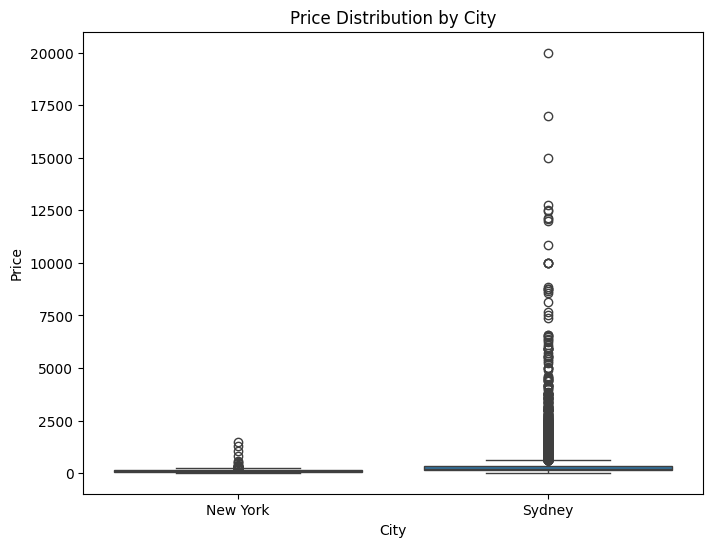

In [4]:
# Price distribution by city

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))               # size
sns.boxplot(x="city", y="price", data=df_all)   #use seaborn will more easy and clean
plt.title("Price Distribution by City") # the title
plt.ylabel("Price")         #change the new y label
plt.xlabel("City")          #change the new x label
plt.show()                  #show plot

In [5]:
stats = df_all.groupby("city")["price"].agg(Count='count',Mean='mean',Median='median',Standard_Deviation='std',Min='min',Max='max')  #aggregate  and also change the name
print(stats)


          Count        Mean  Median  Standard_Deviation   Min      Max
city                                                                  
New York    415  121.004819    93.0          126.004102  24.0   1486.0
Sydney    15734  339.469048   206.0          616.659557  17.0  20000.0


C:\Users\Johnny\AppData\Local\Temp\ipykernel_14812\1753112476.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=room_price, x="room_type", y="price", palette="viridis")


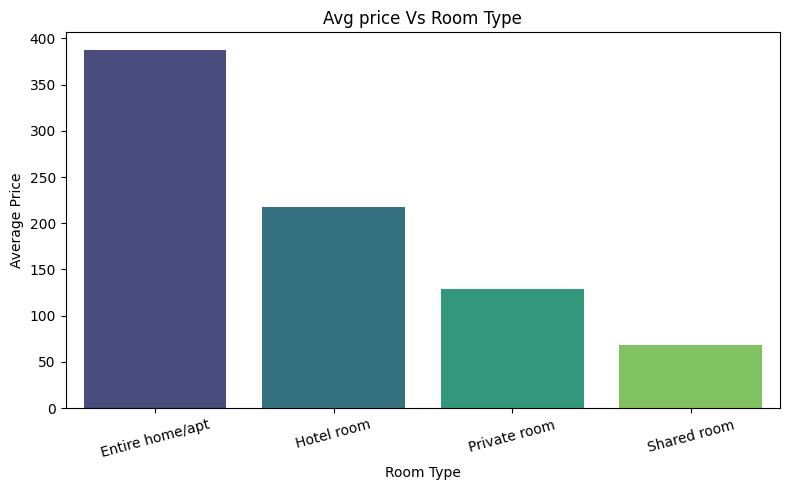

In [6]:
#Compare different room type avg price
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

room_price = df_all.groupby("room_type")["price"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=room_price, x="room_type", y="price", palette="viridis")
plt.title("Avg price Vs Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price")
plt.xticks(rotation=15)     # rotate x axis name
plt.tight_layout()          # auto adjust the gap and hidden
plt.show()



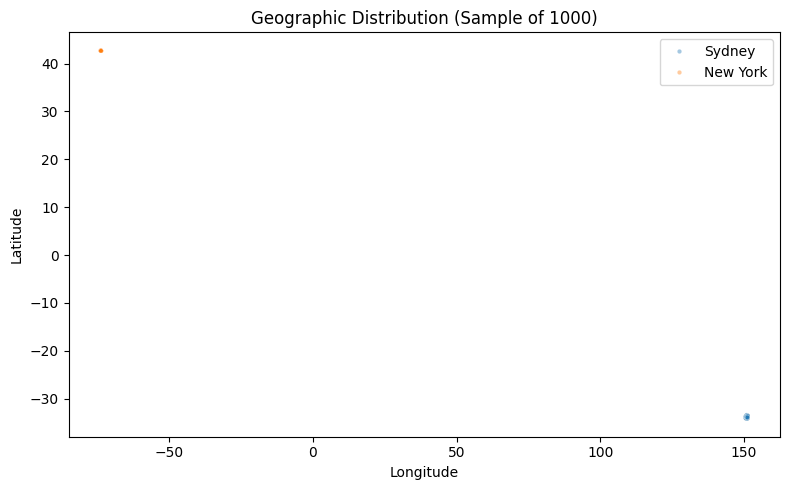

In [7]:
# Geographic Distribution

plt.figure(figsize=(8, 5))       # Set the figure size to 8 inches wide by 6 inches tall
sns.scatterplot(data=df_all.sample(1000), x="longitude", y="latitude", hue="city", alpha=0.4, s=10)
plt.title("Geographic Distribution (Sample of 1000)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()        # add colour to different city pot
plt.tight_layout()
plt.show()


C:\Users\Johnny\AppData\Local\Temp\ipykernel_14812\1347408505.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


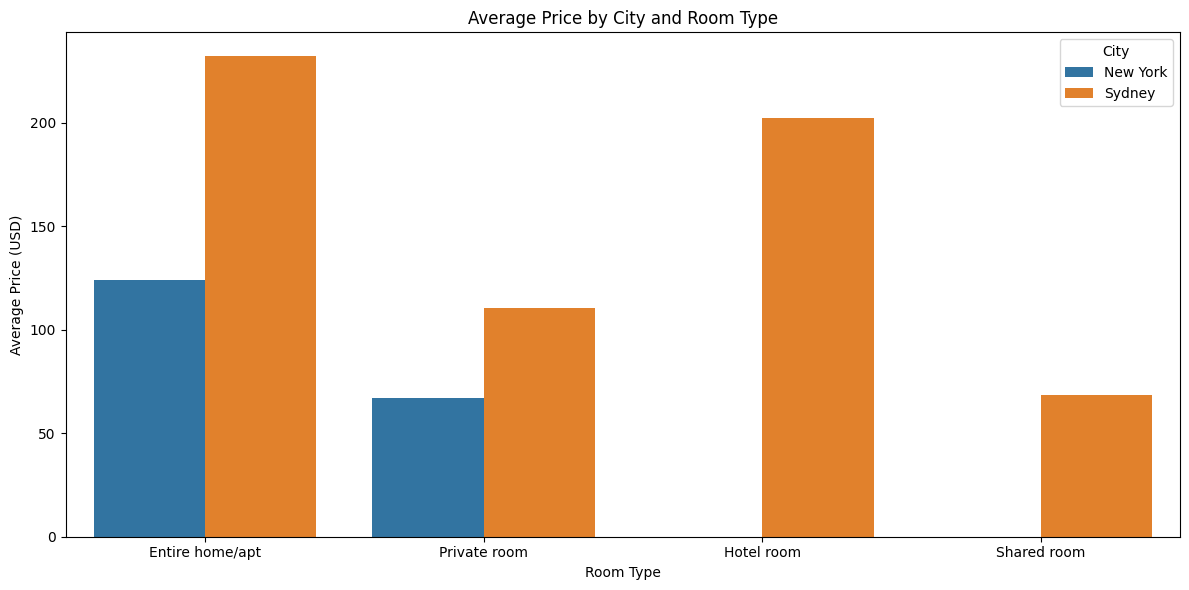

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_all[df_all["price"] < 500], x="room_type", y="price", hue="city", ci=None)      # confidence interval 误差
plt.title("Average Price by City and Room Type")
plt.ylabel("Average Price (USD)")
plt.xlabel("Room Type")
plt.legend(title="City")
plt.tight_layout()
plt.show()


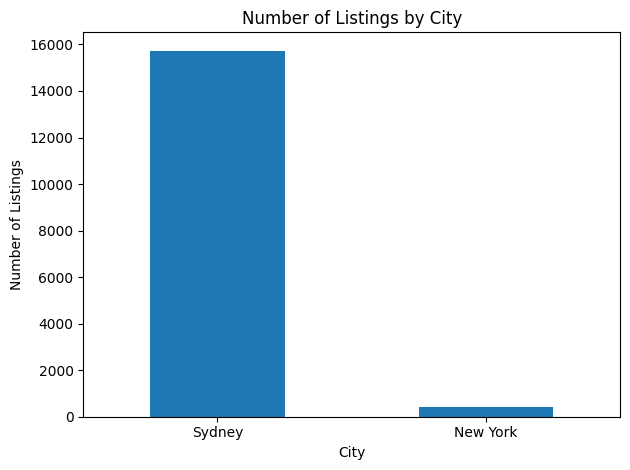

In [9]:
import matplotlib.pyplot as plt

df_all["city"].value_counts().plot(kind='bar')
plt.title("Number of Listings by City")
plt.xlabel("City")
plt.ylabel("Number of Listings")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


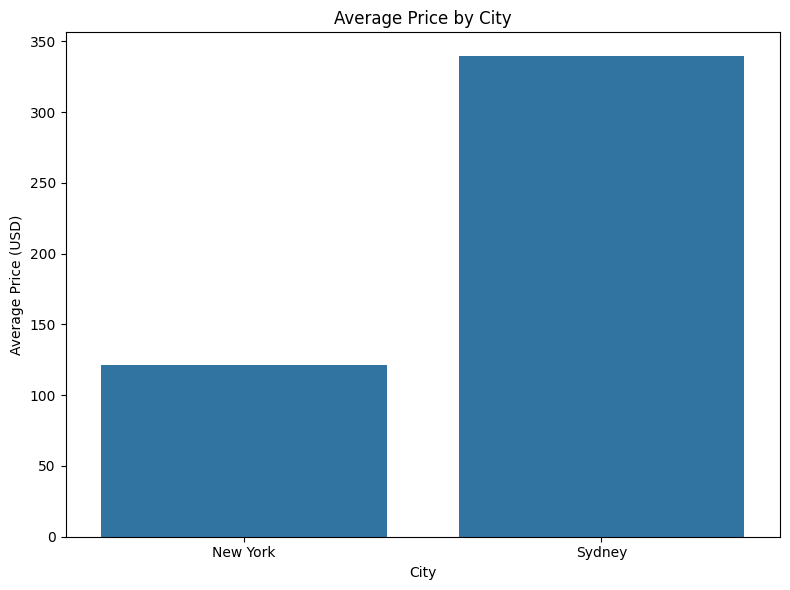

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_price_by_city = df_all.groupby("city")["price"].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=avg_price_by_city, x="city", y="price")
plt.title("Average Price by City")
plt.xlabel("City")
plt.ylabel("Average Price (USD)")
plt.tight_layout()
plt.show()
